## Imports

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

##Graphs

In [ ]:
fb_graph = nx.read_gml("graph_facebook.gml", label='id')
karate_graph = nx.read_gml("graph_karate.gml", label='id')
netsci_graph = nx.read_gml("graph_netsci.gml", label='id')

graph_list = [fb_graph, karate_graph, netsci_graph]

## A01.1.1 Star graph

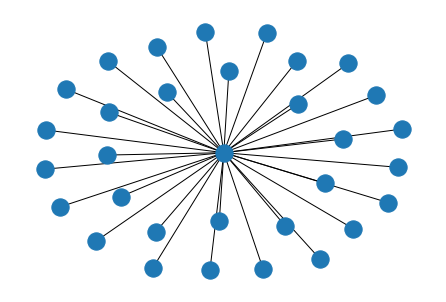

In [ ]:
# A01.1.1

G = nx.Graph()

n = 32

nodes = [i for i in range(1,n+1)]
edges = [(1, i) for i in range(2, n+1)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# st_graph = nx.star_graph(32)
# plt.figure(1)
# nx.draw(st_graph)

# plt.figure(2)
nx.draw(G)

## A01.1.2 Complete graph

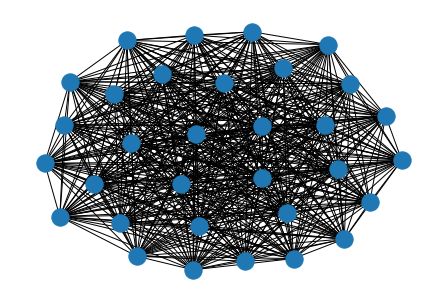

In [ ]:
# A01.1.2

G = nx.Graph()

n = 32

nodes = [i for i in range(1,n+1)]
edges = [(i, j) for i in range(1,n+1) for j in range(i+1,n+1)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G)

## A01.1.3 1D-Lattice

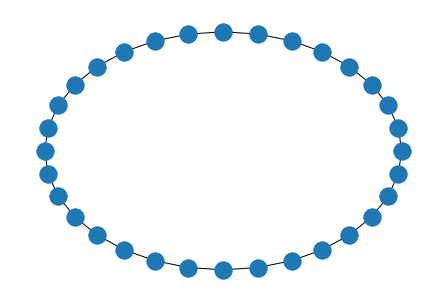

In [ ]:
# A01.1.3

G = nx.Graph()

n = 32

nodes = [i for i in range(0,n)]
edges = [(i, (i+1) % n) for i in range(0,n)]

# print(edges)

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.circular_layout(G)

nx.draw(G, pos=pos)

# A01.2a Global properties

### 1. Degree computation

In [ ]:
output_strings = [
    "Facebook friendships",
    "Zachary Karate Club",
    "NetSci collaborations"
]

str_n_graphs = list(zip(output_strings, graph_list))

output_list = [
    (output_string, 
     [d for (n, d) in graph.degree()]
     ) for output_string, graph in str_n_graphs
]

print(f"Average degrees:\n")
for el in output_list:
  print(f"{el[0]}: {np.mean(el[1]):.2f}")

print(f"\nNetwork density:\n")
output_list = [
    [output_string,
     graph.number_of_edges(),
     graph.number_of_nodes()
     ] for output_string, graph in str_n_graphs
    ]
for el in output_list:
  print(f"{el[0]}: {(2*el[1])/(el[2]*(el[2]-1)):.5f}")

Average degrees:

Facebook friendships: 43.69
Zachary Karate Club: 4.59
NetSci collaborations: 3.75

Network density:

Facebook friendships: 0.01082
Zachary Karate Club: 0.13904
NetSci collaborations: 0.00257


In [ ]:
netsci_graph.degree[33]

5

### 2. max_degree function

In [ ]:
def max_degree(network:nx.Graph):
  n_tuples = list(network.degree())
  degs = [tup[1] for tup in n_tuples]
  max_idx = np.argmax(degs)
  
  return((n_tuples[max_idx][0], n_tuples[max_idx][1]))

print("Max degrees:\n")
for output_string, graph in str_n_graphs:
  print(f"{output_string}: {max_degree(graph)}")

Max degrees:

Facebook friendships: (107, 1045)
Zachary Karate Club: (33, 17)
NetSci collaborations: (42, 34)


## A01.2b Degree distributions

### Facebook

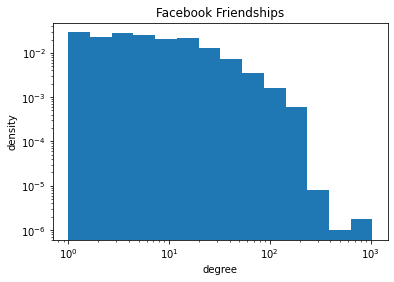

In [ ]:
degs = [d for n, d in fb_graph.degree()]
my_bins = np.logspace(np.log10(min(degs)),np.log10(max(degs) +1), 15) 
plt.hist(degs,bins=my_bins, density=True)
plt.xscale('log')
plt.yscale('log')
# plt.hist(degs)
plt.title('Facebook Friendships')
plt.xlabel('degree')
plt.ylabel('density')
plt.show()

### Network Science

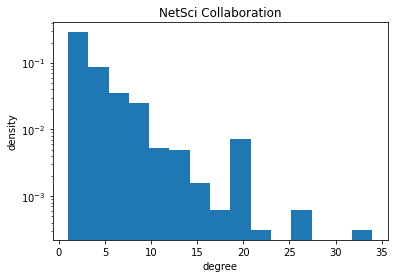

In [ ]:
degs = [d for n, d in netsci_graph.degree()]
# my_bins = np.logspace(np.log10(min(degs)),np.log10(max(degs) +1), 15) 
# plt.xscale('log')
plt.yscale('log')
# plt.hist(degs,bins=my_bins, density=True)
# 15 bins due to visibility of gaps and high amount of bin around degree 20 (no log, because of max-degree 35)
plt.hist(degs, bins=15, density=True)
plt.title('NetSci Collaboration')
plt.xlabel('degree')
plt.ylabel('density')
plt.show()

### Karate

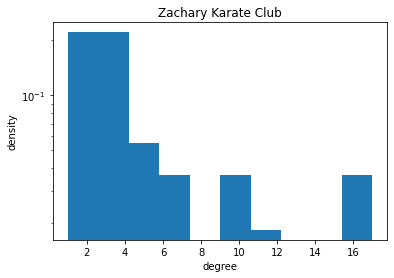

In [ ]:
degs = [d for n, d in karate_graph.degree()]
# my_bins = np.logspace(np.log10(min(degs)),np.log10(max(degs) +1), 20) 
# plt.xscale('log')
plt.yscale('log')
# plt.hist(degs,bins=my_bins, density=True)
# 10 bins because of gaps but overall good overview of existing gaps (no log, because of max-degree 17)
plt.hist(degs, bins=10, density=True) 
plt.title('Zachary Karate Club')
plt.xlabel('degree')
plt.ylabel('density')
plt.show()